# How To Run This Notebook

1. Run all cells until "Graphing Usage" section. 
2. Load data by calling `load_df(path)`, where `path` is filepath to csv file.
3. Get r_bg, r_np, data by calling `r_bg, r_np, df = cleanup(df)`.
4. Optionally remove outliers by calling `df = remove_outliers(df)`.
5. Graph results by calling `graph_firstRun(df, ["fg"])` where `["fg"]` can be replaced with any subset (e.g. `["bg", "np"]`) or omitted entirely (e.g. `graph_firstRun(df)`) to graph all three.

### Imports 

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns

In [49]:
# import csv 
# path = path to csv file
def load_df(path):
    df = pd.read_csv(path, header=None)
    return df

### Data Preprocessing Helper Functions 
(for datasets with schema (site, rank, r_time, r_time_eq, case, label, r_bg, r_np) only)

In [17]:
# makes new rows with clean values, e.g. 'rank=1' --> '1'
def row_cleanup(df):
    df['site'] = df[0].apply(lambda x: x[5:])
    df['rank'] = df[1].apply(lambda x: x[5:])
    df['r_time'] = df[2].apply(lambda x: x[7:])
    df['html_parsing_time'] = df[3].apply(lambda x: x[11:])
    df['label'] = df[5].apply(lambda x: x[6:])
    df['r_bg'] = df[6].apply(lambda x: x[5:])
    df['r_np'] = df[7].apply(lambda x: x[5:])
    
    return df

In [18]:
# drops unnecessary columns, converts to numeric, and gets rid of negatives 
def col_cleanup(df):
    # drop cols
    df_drop = df.drop(columns=[0, 1, 2, 3, 4, 5, 6, 7, 'r_bg', 'r_np'])
    # convert to numeric types
    df = df_drop.astype({'rank':'float', 'r_time':'float', 'html_parsing_time':'float'})
    # get rid of negatives
    df['html_parsing_time'] = abs(df['html_parsing_time'])
    
    return df

In [19]:
# cleans up dataset and returns baseline vals and clean dataframe
def cleanup(df):
    
    df = row_cleanup(df)
    r_bg = float(df['r_bg'].unique()[0])
    r_np = float(df['r_np'].unique()[0])
    df = col_cleanup(df)
    
    return r_bg, r_np, df

In [55]:
# removes outliers
def remove_outliers(df):
    Q1 = df.describe().iloc[4, 1]
    Q3 = df.describe().iloc[6, 1]
    IQR = Q3 - Q1

    df_filtered = df[df['r_time'] < (Q3 + 1.5*IQR)]
    df_filtered = df_filtered[df_filtered['r_time'] > (Q1 - 1.5*IQR)]
    return df_filtered

### Graphs

In [115]:
# graphs rank vs. r_time
# inputs: 
    # df: dataframe 
    # types: list of types to graph, e.g. ["fg"], ["bg", "fg"]. Order does not matter, but don't use duplicates.
    # height: height of graph
    # width: width of graph
    # xlim: limits of x-axis
    # title: title of graph
def graph_firstRun(df, types=[], height=15, width=4, xlim=(0, 0.8), title=""):
    
    # sets height and width
    sns.set(rc={"figure.figsize":(height, width)}) 
    
    # take subset if needed
    if len(types) != 0:
        new_df = pd.DataFrame()
        for ele in types:
            subset = df[df['label'] == ele]
            new_df = pd.concat([new_df, subset])
        df = new_df 
        
    # graph
    ax = sns.scatterplot(data=df, x='r_time', y='rank', hue='label')
    ax.set(xlabel='Relative Loading Time',
           ylabel='Site Rank',
           title=title)
    ax.set_xlim(xlim[0], xlim[1])


In [117]:
# graphs r_time vs. html_parsing
# inputs: 
    # df: dataframe 
    # height: height of graph
    # width: width of graph
    # xlim: limits of x-axis
    # title: title of graph
def graph_case2(df, height=15, width=4, xlim=(0, 0.8), title=""):
    
    # sets height and width
    sns.set(rc={"figure.figsize":(height, width)}) 
    df = df[df["label"] != 'bg']
    
    # graph
    ax = sns.scatterplot(data=df, x='r_time', y='html_parsing_time', hue='label')
    ax.set(xlabel='Relative Loading Time',
           ylabel='HTML Parsing Time',
           title=title)
    ax.set_xlim(xlim[0], xlim[1])

## Graphing Usage 

In [106]:
# load df
df = load_df('browser-security-sv1/results/fg_np_bg_top50.csv')

In [107]:
# get r_bg, r_np, and clean dataset
r_bg, r_np, df = cleanup(df)
print(r_bg)
print(r_np)
df

0.6873007714119748
1.1922525106435813


,site,rank,r_time,html_parsing_time,label
0,google.com,1.0,0.525047,0.000692,np
1,www.google.com,2.0,0.490576,0.000000,np
2,microsoft.com,3.0,0.389094,0.000113,np
3,data.microsoft.com,4.0,0.408223,0.000121,np
4,events.data.microsoft.com,5.0,0.403920,0.000118,np
...,...,...,...,...,...
145,nrdp-ipv6.prod.ftl.netflix.com,46.0,0.162081,0.000051,bg
146,outlook.office365.com,47.0,0.176994,0.000000,bg
147,fonts.googleapis.com,48.0,0.196789,0.000049,bg
148,teams.microsoft.com,49.0,0.225860,0.000057,bg


In [108]:
# optional: remove outliers
df = remove_outliers(df)
df

,site,rank,r_time,html_parsing_time,label
0,google.com,1.0,0.525047,0.000692,np
1,www.google.com,2.0,0.490576,0.000000,np
2,microsoft.com,3.0,0.389094,0.000113,np
3,data.microsoft.com,4.0,0.408223,0.000121,np
4,events.data.microsoft.com,5.0,0.403920,0.000118,np
...,...,...,...,...,...
145,nrdp-ipv6.prod.ftl.netflix.com,46.0,0.162081,0.000051,bg
146,outlook.office365.com,47.0,0.176994,0.000000,bg
147,fonts.googleapis.com,48.0,0.196789,0.000049,bg
148,teams.microsoft.com,49.0,0.225860,0.000057,bg


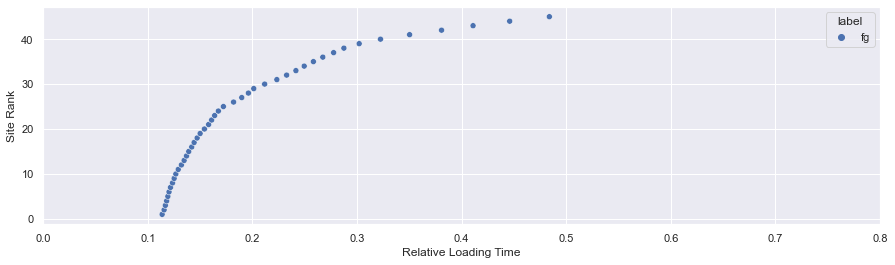

In [118]:
# graphing examples
graph_firstRun(df, ["fg"])

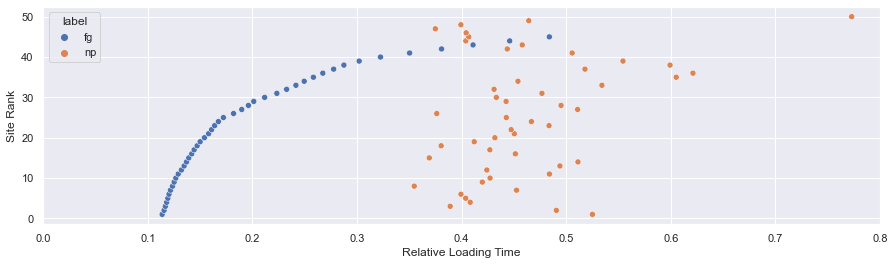

In [119]:
graph_firstRun(df, ["fg", "np"])

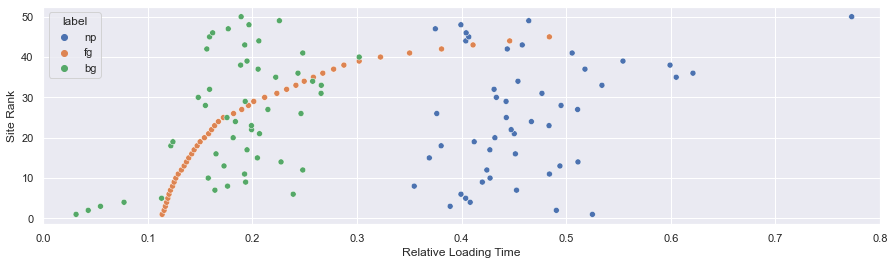

In [120]:
graph_firstRun(df)

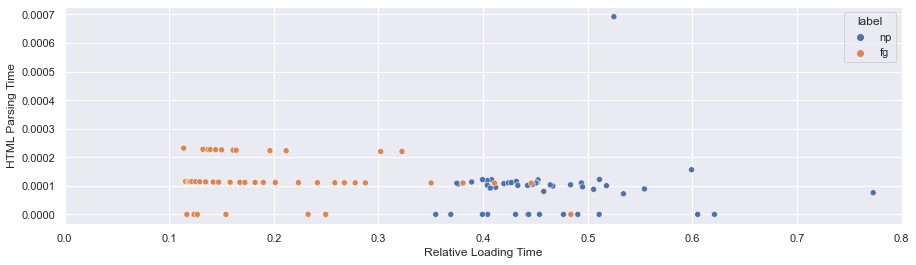

In [121]:
graph_case2(df)

### Get data for SVM: fg (1) vs np (0)

In [99]:
# removes bg and makes a binary label column 
def get_svm1_df(df):
    df_svm = df[df["label"] != 'bg']
    
    svm_label = (df_svm['label'] == 'fg')
    df_svm['svm_label'] = svm_label
    df_svm = df_svm.astype({'svm_label':'int'})
    
    return df_svm

In [134]:
# returns training and testing splits
def get_splits(df):
    X_pd = pd.DataFrame()
    X_pd['r_time'] = df['r_time']
    X_pd['html_parsing_time'] = df['html_parsing_time']
    X = X_pd.to_numpy()
    y = df['svm_label'].to_numpy()
    
    # get training and testing sets
    # 80% train, 20% test
    size = len(df)
    
    split_idx = (size // 5) * 4
    indices = [i for i in range(size)]
    random.shuffle(indices)
    X_train = X[indices[:split_idx]]
    y_train = y[indices[:split_idx]]
    X_test = X[indices[split_idx:size]]
    y_test = y[indices[split_idx:size]]
    
    return X_train, y_train, X_test, y_test
    

In [135]:
def get_svm1_splits(df):
    
    df_svm = get_svm1_df(df)
    X_train, y_train, X_test, y_test = get_splits(df_svm)
    
    return X_train, y_train, X_test, y_test

In [136]:
X_train, y_train, X_test, y_test = get_svm1_splits(df)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(72, 2) (72,) (22, 2) (22,)


C:\Users\Angel\AppData\Local\Temp/ipykernel_11776/2173550911.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_svm['svm_label'] = svm_label


### Make SVM

In [138]:
# make classifier
svm_case2 = SVC(kernel='linear', random_state=0)
svm_case2.fit(X_train, y_train)

train_pred = svm_case2.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
print('Training Accuracy:', "{:.3f}".format(train_acc))

test_pred = svm_case2.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
print('Testing Accuracy:', "{:.3f}".format(test_acc))

Training Accuracy: 0.917
Testing Accuracy: 1.000


### Trial and Error

In [139]:
# try first dataset
df = pd.read_csv('browser-security-sv1/results/fg_np_bg.csv', header=None)

In [143]:
df = row_cleanup(df)
df = col_cleanup(df)
df

,site,rank,r_time,html_parsing_time,label
0,google.com,1.0,0.004239,5.077377e-06,fg
1,www.google.com,2.0,0.004257,6.362094e-07,fg
2,microsoft.com,3.0,0.004274,1.275817e-06,fg
3,data.microsoft.com,4.0,0.004291,1.279326e-06,fg
4,events.data.microsoft.com,5.0,0.004308,6.419582e-07,fg
...,...,...,...,...,...
895,cp.wd.microsoft.com,296.0,0.456641,0.000000e+00,bg
896,nrdp52-appboot.netflix.com,297.0,0.293221,0.000000e+00,bg
897,protection.outlook.com,298.0,0.282086,5.208606e-05,bg
898,go.microsoft.com,299.0,0.296716,0.000000e+00,bg


<Axes: xlabel='r_time', ylabel='rank'>

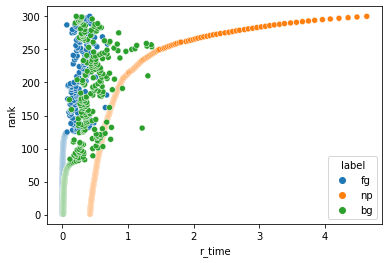

In [144]:
sns.scatterplot(data=df, x='r_time', y='rank', hue='label')

In [194]:
# try Sihan's fg/bg and Mingzhi's np
fg = pd.read_csv('browser-security-sv1/results/frontend.csv', header=None)
bg = pd.read_csv('browser-security-sv1/results/backend.csv', header=None)
np = pd.read_csv('browser-security-sv1/results/np.csv', header=None)

fg['label'] = "fg"
bg['label'] = "bg"
np['label'] = "np"
fg

,0,1,label
0,1,0.019116,fg
1,2,0.008473,fg
2,3,0.013061,fg
3,4,0.009000,fg
4,5,0.011478,fg
...,...,...,...
295,296,0.016870,fg
296,297,0.008169,fg
297,298,0.019919,fg
298,299,0.066070,fg


In [172]:
sep_df = pd.concat([fg, bg, np])
sep_df

,0,1,label
0,1,0.019116,fg
1,2,0.008473,fg
2,3,0.013061,fg
3,4,0.009000,fg
4,5,0.011478,fg
...,...,...,...
295,296,0.076560,np
296,297,0.047068,np
297,298,0.084409,np
298,299,0.146430,np


In [173]:
sep_df = sep_df.rename(columns={1:'r_time', 0:'rank'})
sep_df

,rank,r_time,label
0,1,0.019116,fg
1,2,0.008473,fg
2,3,0.013061,fg
3,4,0.009000,fg
4,5,0.011478,fg
...,...,...,...
295,296,0.076560,np
296,297,0.047068,np
297,298,0.084409,np
298,299,0.146430,np


In [174]:
sep_dropped_df = sep_df[:899]
sep_dropped_df

,rank,r_time,label
0,1,0.019116,fg
1,2,0.008473,fg
2,3,0.013061,fg
3,4,0.009000,fg
4,5,0.011478,fg
...,...,...,...
294,295,0.111054,np
295,296,0.076560,np
296,297,0.047068,np
297,298,0.084409,np


<Axes: xlabel='r_time', ylabel='rank'>

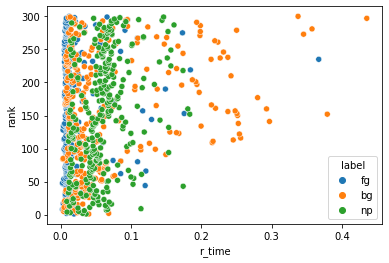

In [176]:
sns.scatterplot(data=sep_dropped_df, x='r_time', y='rank', hue='label')

In [178]:
sep_df_no_fg = pd.concat([bg, np]).rename(columns={1:'r_time', 0:'rank'})
sep_df_no_fg

,rank,r_time,label
0,1,0.040102,bg
1,2,0.068421,bg
2,3,0.023694,bg
3,4,0.026622,bg
4,5,0.004452,bg
...,...,...,...
295,296,0.076560,np
296,297,0.047068,np
297,298,0.084409,np
298,299,0.146430,np


<Axes: xlabel='r_time', ylabel='rank'>

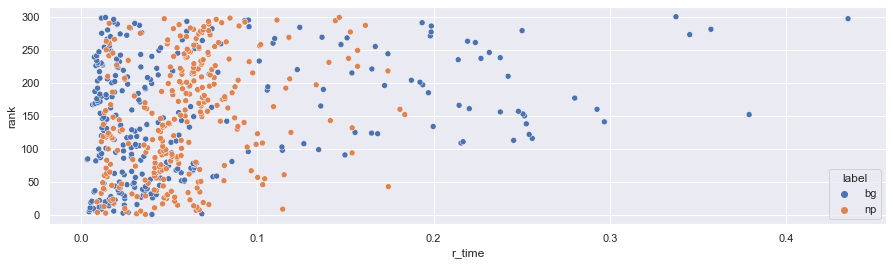

In [201]:
sns.set(rc={"figure.figsize":(15, 4)}) #width=3, #height=4
sep_df_no_fg = sep_df_no_fg[:599]
sns.scatterplot(data=sep_df_no_fg, x='r_time', y='rank', hue='label')

In [239]:
df_50 = fg = pd.read_csv('browser-security-sv1/results/fg_np_bg_top50.csv', header=None)

In [240]:
df_50 = row_cleanup(df_50)

In [242]:
df_50

,0,1,2,3,4,5,6,7,site,rank,r_time,html_parsing_time,label,r_bg,r_np
0,site=google.com,rank=1,r_time=0.5250469628741925,r_time_eq2=0.0006920414212052851,case=0,label=np,r_bg=0.6873007714119748,r_np=1.1922525106435813,google.com,1,0.5250469628741925,0.0006920414212052851,np,0.6873007714119748,1.1922525106435813
1,site=www.google.com,rank=2,r_time=0.49057619787977746,r_time_eq2=0,case=0,label=np,r_bg=0.6873007714119748,r_np=1.1922525106435813,www.google.com,2,0.49057619787977746,0,np,0.6873007714119748,1.1922525106435813
2,site=microsoft.com,rank=3,r_time=0.3890937319545167,r_time_eq2=0.00011340427343048047,case=0,label=np,r_bg=0.6873007714119748,r_np=1.1922525106435813,microsoft.com,3,0.3890937319545167,0.00011340427343048047,np,0.6873007714119748,1.1922525106435813
3,site=data.microsoft.com,rank=4,r_time=0.4082226315348916,r_time_eq2=0.00012143277270243632,case=0,label=np,r_bg=0.6873007714119748,r_np=1.1922525106435813,data.microsoft.com,4,0.4082226315348916,0.00012143277270243632,np,0.6873007714119748,1.1922525106435813
4,site=events.data.microsoft.com,rank=5,r_time=0.4039204598013102,r_time_eq2=0.000118385437872418,case=0,label=np,r_bg=0.6873007714119748,r_np=1.1922525106435813,events.data.microsoft.com,5,0.4039204598013102,0.000118385437872418,np,0.6873007714119748,1.1922525106435813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,site=nrdp-ipv6.prod.ftl.netflix.com,rank=46,r_time=0.16208130214887234,r_time_eq2=0.00005056628657431029,case=0,label=bg,r_bg=0.6873007714119748,r_np=1.1922525106435813,nrdp-ipv6.prod.ftl.netflix.com,46,0.16208130214887234,0.00005056628657431029,bg,0.6873007714119748,1.1922525106435813
146,site=outlook.office365.com,rank=47,r_time=0.17699390849786562,r_time_eq2=0,case=0,label=bg,r_bg=0.6873007714119748,r_np=1.1922525106435813,outlook.office365.com,47,0.17699390849786562,0,bg,0.6873007714119748,1.1922525106435813
147,site=fonts.googleapis.com,rank=48,r_time=0.19678875485570246,r_time_eq2=0.00004879485672620596,case=0,label=bg,r_bg=0.6873007714119748,r_np=1.1922525106435813,fonts.googleapis.com,48,0.19678875485570246,0.00004879485672620596,bg,0.6873007714119748,1.1922525106435813
148,site=teams.microsoft.com,rank=49,r_time=0.22586027772196848,r_time_eq2=0.00005712337449126015,case=0,label=bg,r_bg=0.6873007714119748,r_np=1.1922525106435813,teams.microsoft.com,49,0.22586027772196848,0.00005712337449126015,bg,0.6873007714119748,1.1922525106435813


In [243]:
print(df_50['r_np'].unique())
r_np = float(df_50['r_np'].unique()[0])
r_np

print(df_50['r_bg'].unique())
r_bg = float(df_50['r_bg'].unique()[0])
r_bg

['1.1922525106435813']
['0.6873007714119748']


0.6873007714119748

In [246]:

df_50 = col_cleanup(df_50)
df_50

,site,rank,r_time,html_parsing_time,label
0,google.com,1.0,0.525047,0.000692,np
1,www.google.com,2.0,0.490576,0.000000,np
2,microsoft.com,3.0,0.389094,0.000113,np
3,data.microsoft.com,4.0,0.408223,0.000121,np
4,events.data.microsoft.com,5.0,0.403920,0.000118,np
...,...,...,...,...,...
145,nrdp-ipv6.prod.ftl.netflix.com,46.0,0.162081,0.000051,bg
146,outlook.office365.com,47.0,0.176994,0.000000,bg
147,fonts.googleapis.com,48.0,0.196789,0.000049,bg
148,teams.microsoft.com,49.0,0.225860,0.000057,bg


<Axes: xlabel='r_time', ylabel='rank'>

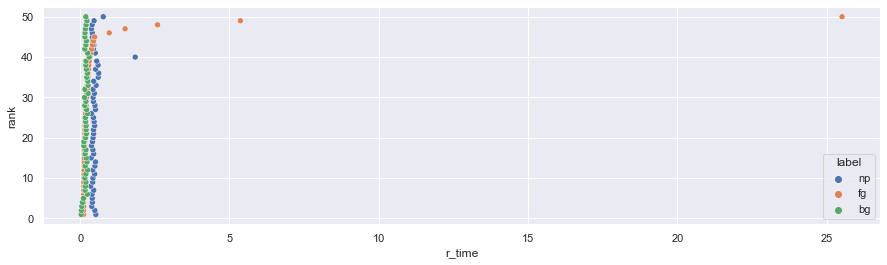

In [207]:
sns.scatterplot(data=df_50, x='r_time', y='rank', hue='label')

In [208]:
df_50_fg_only = df_50[df_50['label'] == 'fg']

<Axes: xlabel='r_time', ylabel='rank'>

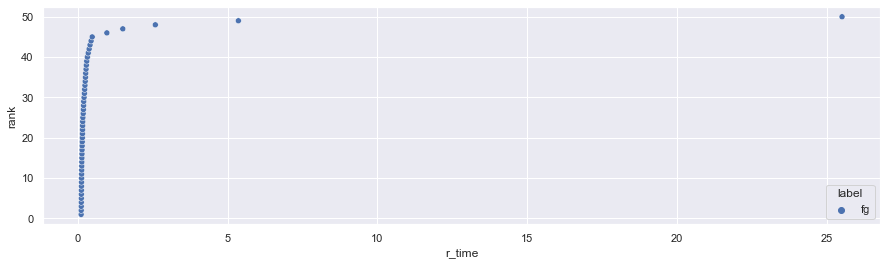

In [209]:
sns.scatterplot(data=df_50_fg_only, x='r_time', y='rank', hue='label')

<Axes: xlabel='r_time', ylabel='rank'>

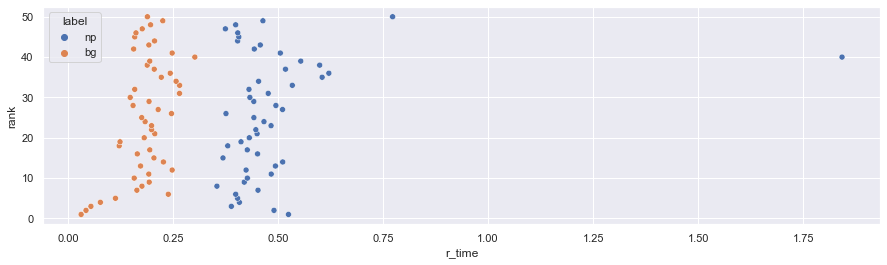

In [210]:
df_50_bg_np = df_50[df_50['label'] != 'fg']
sns.scatterplot(data=df_50_bg_np, x='r_time', y='rank', hue='label')

(0.0, 0.8)

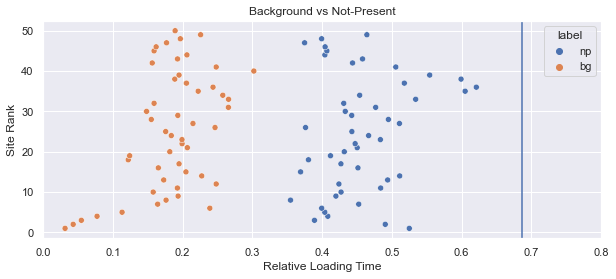

In [245]:
import matplotlib.pyplot as plt

sns.set(rc={"figure.figsize":(10, 4)}) #width=3, #height=4
ax = sns.scatterplot(data=df_50_np_bg, x='r_time', y='rank', hue='label')
ax.set(xlabel='Relative Loading Time',
       ylabel='Site Rank',
       title='Background vs Not-Present')

ax.set_xlim(0, 0.8)


(0.0, 0.8)

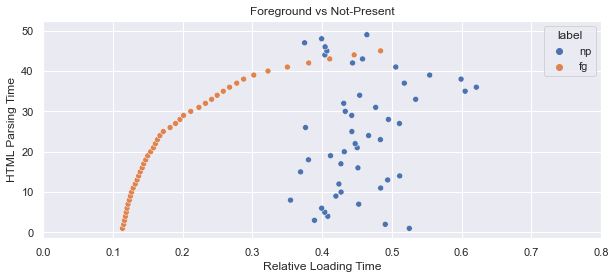

In [253]:
df_50_np_fg = pd.concat([np_filtered, df_50[df_50['label'] == 'fg']])

sns.set(rc={"figure.figsize":(10, 4)}) #width=3, #height=4
ax = sns.scatterplot(data=df_50_np_fg, x='r_time', y='rank', hue='label')
ax.set(xlabel='Relative Loading Time',
       ylabel='HTML Parsing Time',
       title='Foreground vs Not-Present')

ax.set_xlim(0, 0.8)

In [304]:
df_50 = pd.read_csv('browser-security-sv1/results/fg_np_bg_top50_2.csv', header=None)

In [305]:
df_50

,0,1,2,3,4,5,6,7
0,site=google.com,rank=1,r_time=0.2659186279998729,r_time_eq2=0.00043205859190943984,case=0,label=np,r_bg=0.6424781788004189,r_np=1.2259677003854346
1,site=www.google.com,rank=2,r_time=0.45936188877443096,r_time_eq2=0.00008920596640124364,case=0,label=np,r_bg=0.6424781788004189,r_np=1.2259677003854346
2,site=microsoft.com,rank=3,r_time=0.500000000232719,r_time_eq2=0.00009838663852168964,case=0,label=np,r_bg=0.6424781788004189,r_np=1.2259677003854346
3,site=data.microsoft.com,rank=4,r_time=0.5635645799122613,r_time_eq2=0.00010027061898937103,case=0,label=np,r_bg=0.6424781788004189,r_np=1.2259677003854346
4,site=events.data.microsoft.com,rank=5,r_time=0.5842116582749276,r_time_eq2=0.00010745774703329106,case=0,label=np,r_bg=0.6424781788004189,r_np=1.2259677003854346
...,...,...,...,...,...,...,...,...
85,site=ftl.netflix.com,rank=26,r_time=0.18379569464627057,r_time_eq2=0.00006578949596179197,case=0,label=bg,r_bg=0.6424781788004189,r_np=1.2259677003854346
86,site=prod.ftl.netflix.com,rank=27,r_time=0.20317935437885837,r_time_eq2=0,case=0,label=bg,r_bg=0.6424781788004189,r_np=1.2259677003854346
87,site=settings-win.data.microsoft.com,rank=28,r_time=0.16339020230934298,r_time_eq2=0.00008159925608680972,case=0,label=bg,r_bg=0.6424781788004189,r_np=1.2259677003854346
88,site=www.googleapis.com,rank=29,r_time=0.15457907970875806,r_time_eq2=0.00009406469698997947,case=0,label=bg,r_bg=0.6424781788004189,r_np=1.2259677003854346


In [306]:
df_50 = row_cleanup(df_50)
df_50 = col_cleanup(df_50)
df_50

,site,rank,r_time,html_parsing_time,label
0,google.com,1.0,0.265919,0.000432,np
1,www.google.com,2.0,0.459362,0.000089,np
2,microsoft.com,3.0,0.500000,0.000098,np
3,data.microsoft.com,4.0,0.563565,0.000100,np
4,events.data.microsoft.com,5.0,0.584212,0.000107,np
...,...,...,...,...,...
85,ftl.netflix.com,26.0,0.183796,0.000066,bg
86,prod.ftl.netflix.com,27.0,0.203179,0.000000,bg
87,settings-win.data.microsoft.com,28.0,0.163390,0.000082,bg
88,www.googleapis.com,29.0,0.154579,0.000094,bg


(0.0, 0.8)

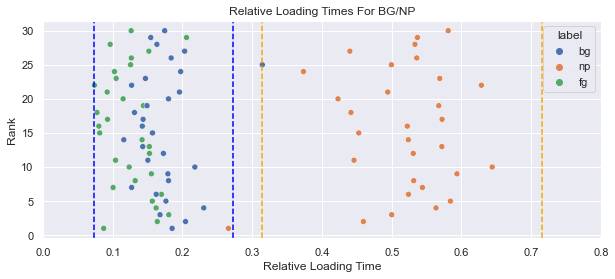

In [307]:
df_50_np_bg = pd.concat([df_50[df_50['label'] == 'bg'], df_50[df_50['label'] == 'np']])

sns.set(rc={"figure.figsize":(10, 4)}) #width=3, #height=4
ax = sns.scatterplot(data=df_50, x='r_time', y='rank', hue='label', hue_order=['bg', 'np', 'fg'])
ax.set(xlabel='Relative Loading Time',
       ylabel='Rank',
       title='Relative Loading Times For BG/NP')

plt.axvline(bg_interval[0], color='blue', linestyle='--')
plt.axvline(bg_interval[1], color='blue', linestyle='--')

plt.axvline(np_interval[0], color='orange', linestyle='--')
plt.axvline(np_interval[1], color='orange', linestyle='--')

ax.set_xlim(0, 0.8)

In [289]:
bg = df_50[df_50['label'] == 'bg']
bg_mean = bg['r_time'].mean()
bg_std = bg['r_time'].std()

In [290]:
np = df_50[df_50['label'] == 'np']
np_mean = np['r_time'].mean()
np_std = np['r_time'].std()

In [292]:
# confidence testing to find DELTA
# interval(confidence, loc=0, scale=1)
import scipy.stats as st

bg_interval = st.norm.interval(confidence=0.99, loc=bg_mean, scale=bg_std)
print(bg_interval)

np_interval = st.norm.interval(confidence=0.99, loc=np_mean, scale=np_std)
print(np_interval)

(0.07312005743219156, 0.2720447079693591)
(0.31426505364966517, 0.7160401429971497)


In [293]:
bg_interval[0]

0.07312005743219156

[Text(0.5, 0, 'Relative Loading Time'),
 Text(0, 0.5, 'Rank'),
 Text(0.5, 1.0, 'Relative Loading Times For FG/NP')]

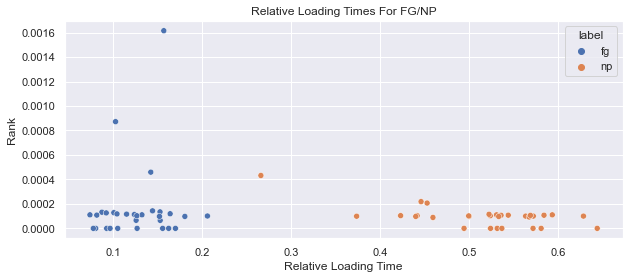

In [353]:
df_50_np_fg = pd.concat([df_50[df_50['label'] == 'fg'], df_50[df_50['label'] == 'np']])

sns.set(rc={"figure.figsize":(10, 4)}) #width=3, #height=4
ax = sns.scatterplot(data=df_50_np_fg, x='r_time', y='html_parsing_time', hue='label')
ax.set(xlabel='Relative Loading Time',
       ylabel='Rank',
       title='Relative Loading Times For FG/NP')


In [315]:
df_50_np_fg['svm_label'] = df_50_np_fg['label'] == 'fg'
df_50_np_fg = df_50_np_fg.astype({'svm_label':'int'})

In [316]:
# svm
X_pd = pd.DataFrame()
X_pd['r_time'] = df_50_np_fg['r_time']
X_pd['html_parsing_time'] = df_50_np_fg['html_parsing_time']
X = X_pd.to_numpy()
y = df_50_np_fg['svm_label'].to_numpy()

In [324]:
import numpy as np

indices = [i for i in range(30)]
random.shuffle(indices)
X_train_np = X[indices[:24]]
y_train_np = y[indices[:24]]
X_test_np = X[indices[24:30]]
y_test_np = y[indices[24:30]]
print(type(X_train_np))

indices = [i for i in range(30,60)]
X_train_fg = X[indices[:24]]
y_train_fg = y[indices[:24]]
X_test_fg = X[indices[24:30]]
y_test_fg = y[indices[24:30]]
print(type(X_train_fg))
print(X_train_fg)

X_train = np.concatenate((X_train_np, X_train_fg))
y_train = np.concatenate((y_train_np, y_train_fg))
X_test = np.concatenate((X_test_np, X_test_fg))
y_test = np.concatenate((y_test_np, y_test_fg))

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[2.65918628e-01 4.32058592e-04]
 [4.59361889e-01 8.92059664e-05]
 [5.00000000e-01 9.83866385e-05]
 [5.63564580e-01 1.00270619e-04]
 [5.84211658e-01 1.07457747e-04]
 [5.24098416e-01 0.00000000e+00]
 [5.44044044e-01 1.07828531e-04]
 [5.31590656e-01 0.00000000e+00]
 [5.93530931e-01 1.10534077e-04]
 [6.44045162e-01 0.00000000e+00]
 [4.45989861e-01 2.18746656e-04]
 [5.30890988e-01 1.10607110e-04]
 [5.71890339e-01 0.00000000e+00]
 [5.23845193e-01 1.03305970e-04]
 [4.52802504e-01 2.06803917e-04]
 [5.22412491e-01 1.14929190e-04]
 [5.72202166e-01 1.00381337e-04]
 [4.41588297e-01 1.03745086e-04]
 [5.67523593e-01 9.29369697e-05]
 [4.23011303e-01 1.03971604e-04]
 [4.94315745e-01 0.00000000e+00]
 [6.28583128e-01 1.00170178e-04]
 [5.68957822e-01 1.06156994e-04]
 [3.73527440e-01 9.93639590e-05]]
(48, 2)
(48,)
(12, 2)
(12,)


In [325]:
svm_case2 = SVC(kernel='linear', random_state=0)
svm_case2.fit(X_train, y_train)

train_pred = svm_case2.predict(X_train)
train_acc = accuracy_score(y_train, train_pred)
print('Training Accuracy:', "{:.3f}".format(train_acc))

test_pred = svm_case2.predict(X_test)
test_acc = accuracy_score(y_test, test_pred)
print('Testing Accuracy:', "{:.3f}".format(test_acc))

Training Accuracy: 0.979
Testing Accuracy: 1.000


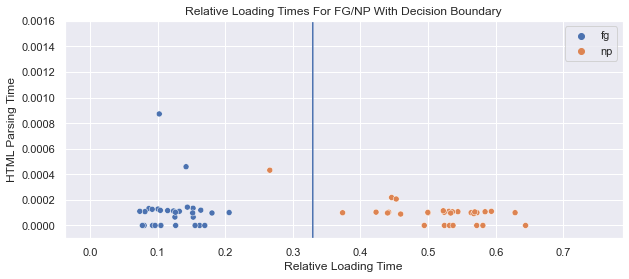

In [355]:
# reference: https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
from sklearn.inspection import DecisionBoundaryDisplay



ax = sns.scatterplot(data=df_50_np_fg, x='r_time', y='html_parsing_time', hue='label')
w = svm_case2.coef_[0]           # w consists of 2 elements
b = svm_case2.intercept_[0]      # b consists of 1 element
x_points = np.linspace(0, 0.75)    # generating x-points from -1 to 1
y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points
# Plotting a red hyperplane
# plt.plot(x_points, y_points, c='r');
sns.lineplot(x=x_points, y=y_points)

ax.set(xlabel='Relative Loading Time',
       ylabel='HTML Parsing Time',
       title='Relative Loading Times For FG/NP With Decision Boundary')
ax.set_ylim(-0.0001, 0.0016)

plt.show()